1. Reading the CSV File:

In [49]:
import pandas as pd

# Load the ACC players data
acc_df = pd.read_csv('acc_players-2324F.csv', sep=',', encoding='latin1', header=1)

# display first 5 rows
acc_df.head(5)

,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
0,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.200,0.615,4.1,-0.1,-6.4
1,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.500,0.500,NaN,NaN,3.5,0.0,-6.7
2,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.620,9.4,0.9,-1.3
3,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0.000,1.000,NaN,1.1,0.0,-8.2
4,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18.0,2.9,7.9


2. Basic Analysis:

In [50]:
# calc total points of all players 
total_points = acc_df["PTS"].sum()

# print result 
print('Total Points of All Players Combined:')
total_points

Total Points of All Players Combined:


38411

In [51]:
# calc player with most minutes
most_min = acc_df[['Player',"MP"]].sort_values(by="MP", ascending=False).head(1)

# print result 
print("Player With Most Minutes Played:")
most_min

Player With Most Minutes Played:


,Player,MP
135,Casey Morsell,1333


In [52]:
# calc top 5 players with most total rebounds
most_trb = acc_df[['Player',"TRB"]].sort_values(by="TRB", ascending=False).head(5)

# print result 
print("Top 5 Players with Most Total Rebounds:")
most_trb

Top 5 Players with Most Total Rebounds:


,Player,TRB
5,Armando Bacot,380
178,Ian Schieffelin,340
90,Harrison Ingram,327
44,Mohamed Diarra,311
149,Norchad Omier,309


3. Player Filtering:

In [53]:
# new dataframe with players who played >500 minutes
acc_mostmin = acc_df.query('MP > 500')

# display first 5 rows 
acc_mostmin.head(5)

,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
2,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.620,9.4,0.9,-1.3
4,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18.0,2.9,7.9
5,6,Armando Bacot,SR,F,North Carolina,37,1123,380,56,22,...,60,100,538,0.540,0.544,0.400,0.781,24.6,6.1,8.9
7,8,Reece Beekman,SR,G,Virginia,34,1114,124,212,68,...,70,43,486,0.443,0.487,0.310,0.754,23.4,4.9,10.5
9,10,Chris Bell,SO,F,Syracuse,32,865,75,21,18,...,26,58,384,0.434,0.459,0.420,0.842,14.9,2.2,3.3


In [54]:
# calc player with most assists
most_assist = acc_mostmin[['Player',"AST"]].sort_values(by="AST", ascending=False).head(1)

# print result 
print("Player with Highest Total Assists:")
most_assist

Player with Highest Total Assists:


,Player,AST
7,Reece Beekman,212


In [55]:
# calc top 3 players with most assists
most_ast = acc_df[['Player',"AST"]].sort_values(by="AST", ascending=False).head(3)

# print result 
print("Top 3 Assist Leads in League:")
most_ast

Top 3 Assist Leads in League:


,Player,AST
7,Reece Beekman,212
215,Jaeden Zackery,152
21,Elliot Cadeau,150


In [22]:
# calc top 3 players with shot blockers
most_blk = acc_df[['Player',"BLK"]].sort_values(by="BLK", ascending=False).head(3)

# print result 
print("Top 3 Shot Blockers:")
most_blk

Top 3 Shot Blockers:


,Player,BLK
51,Ryan Dunn,77
157,Quinten Post,61
5,Armando Bacot,56


4. School-Based Analysis

In [25]:
# group players by school and calculate total points scored by each
school_pts = acc_df.groupby('School')[['PTS']].sum()

# print results
print("Total Points for Each School:")
school_pts

Total Points for Each School:


,PTS
School,
Boston College,2667
Clemson,2785
Duke,2830
Florida State,2526
Georgia Tech,2272
Louisville,2304
Miami (FL),2424
NC State,3101
North Carolina,3032


In [27]:
# group players by school and calculate total assist for each
school_ast = acc_df.groupby('School')[['AST']].sum()

# print results
print("Total Assists for Each School:")
school_ast

Total Assists for Each School:


,AST
School,
Boston College,509
Clemson,533
Duke,551
Florida State,406
Georgia Tech,425
Louisville,356
Miami (FL),454
NC State,536
North Carolina,536


In [32]:
# sort schools by total points scored and get top 3
Top3_school = school_pts.sort_values(by="PTS", ascending=False).head(3)

print("Top 3 Point-Scoring Schools:")
Top3_school

Top 3 Point-Scoring Schools:


,PTS
School,
NC State,3101
North Carolina,3032
Duke,2830


5. Extra Credit

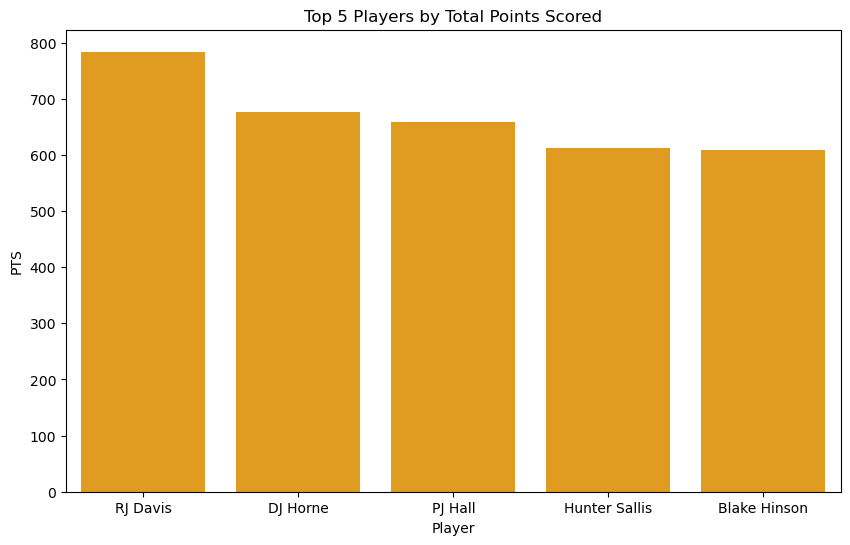

In [44]:
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# find top 5 players by total points scored
top5_pts = acc_df[['Player',"PTS"]].sort_values(by="PTS", ascending=False).head(5)

# bar chart shorting top 5 players by PTS
plt.figure(figsize=(10,6))
sns.barplot(x='Player', y='PTS', data=top5_pts, color='orange')
plt.title('Top 5 Players by Total Points Scored')
plt.show()

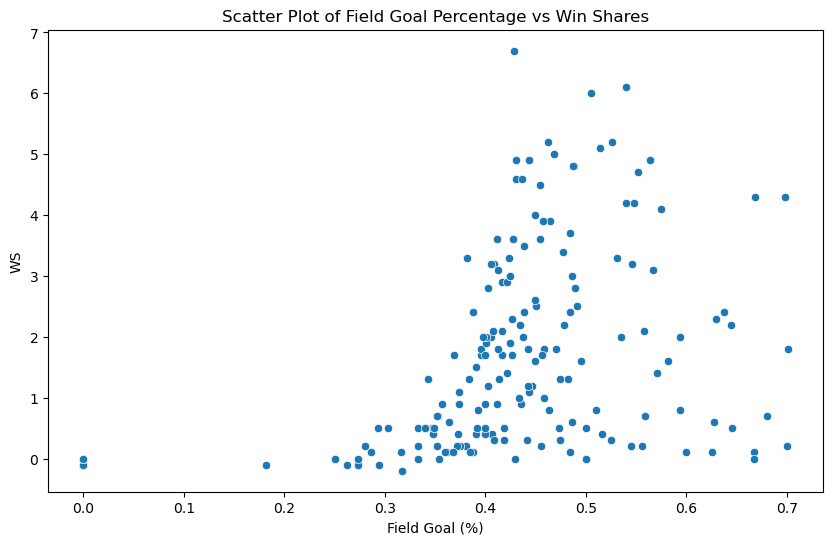

In [46]:
# plot scatterplot of FG% and WS to investigate correlation
plt.figure(figsize=(10,6))
sns.scatterplot(data=acc_df, x="FG%", y="WS")
plt.title('Scatter Plot of Field Goal Percentage vs Win Shares')
plt.xlabel('Field Goal (%)')
plt.ylabel('Win Shares')
plt.show()

In [48]:
# calculate correlation coefficient of FG and WS
correlation = acc_df['FG%'].corr(acc_df['WS'])
print('Correlation of FG% and WS:')
correlation

Correlation of FG% and WS:


0.4210663894199787

There does not appear to be a correlation between field goal percentage and win shares as the scatterplot does not have a strong linear trend between the two variables. Furthermore, the correlation coefficient is quite small and not near 1 or -1 so it proves there is no correlation. 

# Reflection
*What did you learn about working with CSV files and pandas DataFrames in this assignment?*
I'm pretty familiar with using CSV files and pandas DataFrames from my other classes but it was interesting to apply those skills to this class. I knew how to read in CSV files as well as how to filter and manipulate them. A lot of the methods we use in this class are slightly different than I've used before so it was helpful to learn that there are multiple ways to do things. For example, I learned how to filter dataframes using queries. In other classes, I've used different methods such as subsetting or .isin to filter so that was a new skill. I've also done very little plotting using Python so using the seaborn library to plot was a new skill as well. I think it is a very quick way to get visualizations so I like it. While I do a lot of data analysis using R in my other classes, these methods could be useful in the future if I am required to use Python or if I need to make quick plots. 

*What was the most challenging aspect of this assignment, and how did you
overcome it?*
It was challenging to display the headers, or column names, in the dataset correctly. I'm used to the column names being the first row in a CSV file. However, this time they were the second row so they showed up as the first row of the data. From coding in other classes, I know that functions that read in data often have 'header = ?' options. I tried using True and False as the inputs but when that didn't work, I remembered that pandas Dataframes number the rows. I played around with different numbers as the inputs until my headers displayed correctly. Another challenge was knowing the column names to use throughout the assignment. I solved this by opening the CSV file in another Jupyter tab and looking at the raw data. However, in the future it would probably be helpful to use something like .columns to view the column names. 

*How do you think the insights gained from analyzing ACC basketball statistics
could be applied to other real-world datasets?*
The techniques of data analysis that I used on the ACC basketball statistics can be used in any industry to analyze other datasets. In this assignment, I used pandas to filter and manipulate the data in order to identify patterns and trends in player performance. I could easily use the same methods to find trends in certain markets or to look at customer behavior. The skills used in the extra credit section would certaintly be useful in the real-world. It is important to visualize all kinds of data as it can give other people an easy view of trends in the data when done correctly. I displayed a bar graph of top point scorers but it could easily be a bar graph of movies that made the most revenue or diseases that had the most diagnoses. Furthermore, looking at correlation between different variables is very helpful to see how they interact and can prepare a data analyst to make predictions using the data in all fields. Overall, this experience will help me use data analysis in any field as these methods can be applied to all kinds of different datasets. 